# 07_Asset_Utilisation_Analysis.ipynb

## Title: "Asset Utilisation Analysis"

### Contents:

- Exploring Turnover Ratio data from SEC.
- Comparison with ---.sql. #TODO
- Asset Turnover Ratio analysis.
- Visual representations and implications.

---

# Set Up the Environment

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Functions

In [2]:
from prepare_and_sort_data_quarterly import prepare_and_sort_financial_data

# Load Data

## Load Data from CSV File

In [3]:
raw_data = pd.read_csv('combined_df.csv')

In [4]:
# Inspect the first few rows of the dataset
raw_data.head(2)

,EntityName,CIK,Metric,start,end,val,accn,fy,fp,form,filed,frame
0,THE BOEING COMPANY,12927,Revenues,2007-01-01,2007-12-31,66387000000,0001193125-10-024406,2009,FY,10-K,2010-02-08,CY2007
1,THE BOEING COMPANY,12927,Revenues,2008-01-01,2008-06-30,32952000000,0001193125-09-152905,2009,Q2,10-Q,2009-07-22,NaN


In [5]:
# Convert 'end' column to datetime for proper sorting
raw_data['end'] = pd.to_datetime(raw_data['end'], format='%Y-%m-%d')


In [6]:
# Check the data types and look for any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EntityName  394 non-null    object        
 1   CIK         394 non-null    int64         
 2   Metric      394 non-null    object        
 3   start       278 non-null    object        
 4   end         394 non-null    datetime64[ns]
 5   val         394 non-null    int64         
 6   accn        394 non-null    object        
 7   fy          394 non-null    int64         
 8   fp          394 non-null    object        
 9   form        394 non-null    object        
 10  filed       394 non-null    object        
 11  frame       134 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 37.1+ KB


# Individual Metrics Analysis

## Analysis of Revenues

In [7]:
revenues = raw_data[raw_data['Metric'] == 'Revenues']

In [8]:
revenues_data = prepare_and_sort_financial_data(raw_data, 'Revenues')

In [9]:
revenues_data.head(5)

,EntityName,CIK,Metric,start,end,val,year,quarter
2,THE BOEING COMPANY,12927,Revenues,2008-04-01,2008-06-30,16962000000,2008,Q2
4,THE BOEING COMPANY,12927,Revenues,2008-07-01,2008-09-30,15293000000,2008,Q3
8,THE BOEING COMPANY,12927,Revenues,2009-01-01,2009-03-31,16502000000,2009,Q1
13,THE BOEING COMPANY,12927,Revenues,2009-04-01,2009-06-30,17154000000,2009,Q2
18,THE BOEING COMPANY,12927,Revenues,2009-07-01,2009-09-30,16688000000,2009,Q3


           CIK                            end           val
count     59.0                             59  5.900000e+01
mean   12927.0  2016-01-10 08:56:56.949152512  1.971341e+10
min    12927.0            2008-06-30 00:00:00  1.180700e+10
25%    12927.0            2012-05-15 12:00:00  1.661550e+10
50%    12927.0            2015-12-31 00:00:00  1.955500e+10
75%    12927.0            2019-08-15 00:00:00  2.316850e+10
max    12927.0            2023-09-30 00:00:00  2.834100e+10
std        0.0                            NaN  3.790732e+09


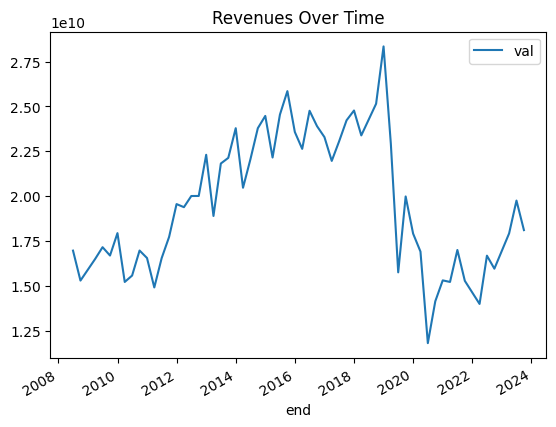

In [10]:
print(revenues_data.describe())
revenues_data.plot(x='end', y='val', title='Revenues Over Time')
plt.show()


## Analysis of PropertyPlantAndEquipmentNet 

In [11]:
equipment_net = raw_data[raw_data['Metric'] == 'PropertyPlantAndEquipmentNet']

In [12]:
equipment_net_data = prepare_and_sort_financial_data(raw_data, 'PropertyPlantAndEquipmentNet')

In [13]:
equipment_net_data.head(10)

,EntityName,CIK,Metric,start,end,val,year,quarter
280,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2008-12-31,8762000000,2008,Q4
281,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2009-06-30,8808000000,2009,Q2
282,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2009-09-30,8912000000,2009,Q3
287,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2009-12-31,8784000000,2009,Q4
288,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2010-03-31,8693000000,2010,Q1
289,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2010-06-30,8584000000,2010,Q2
290,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2010-09-30,8671000000,2010,Q3
295,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2010-12-31,8931000000,2010,Q4
296,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2011-03-31,8973000000,2011,Q1
297,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2011-06-30,9044000000,2011,Q2


<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 280 to 393
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EntityName  59 non-null     object        
 1   CIK         59 non-null     int64         
 2   Metric      59 non-null     object        
 3   start       0 non-null      object        
 4   end         59 non-null     datetime64[ns]
 5   val         59 non-null     int64         
 6   year        59 non-null     object        
 7   quarter     59 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 4.1+ KB
None


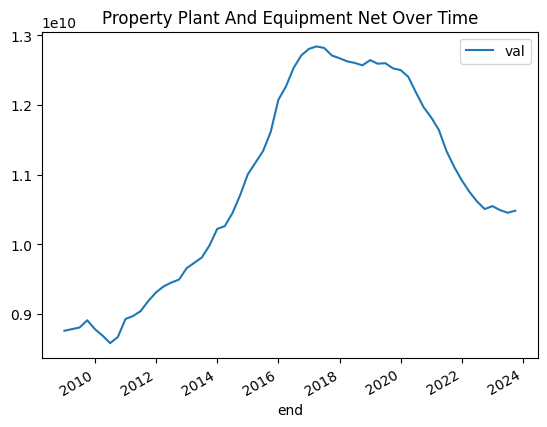

In [14]:
print(equipment_net_data.info())
equipment_net_data.plot(x='end', y='val', title='Property Plant And Equipment Net Over Time')
plt.show()


# Merge the Data

In [15]:
df_merged = pd.merge(equipment_net_data, revenues_data, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer', suffixes=('_equipment', '_revenues'))

In [16]:
df_merged.rename(columns={'val_equipment': 'EquipmentNet', 
                          'val_revenues': 'Revenues'}, inplace=True)

In [17]:
df_merged.head()

,EntityName,CIK,Metric_equipment,start_equipment,end,EquipmentNet,year,quarter,Metric_revenues,start_revenues,Revenues
0,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2008-12-31,8.762000e+09,2008,Q4,NaN,NaN,NaN
1,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2009-06-30,8.808000e+09,2009,Q2,Revenues,2009-04-01,1.715400e+10
2,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2009-09-30,8.912000e+09,2009,Q3,Revenues,2009-07-01,1.668800e+10
3,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2009-12-31,8.784000e+09,2009,Q4,Revenues,2009-10-01,1.793700e+10
4,THE BOEING COMPANY,12927,PropertyPlantAndEquipmentNet,NaN,2010-03-31,8.693000e+09,2010,Q1,Revenues,2010-01-01,1.521600e+10


# Calculation

**Asset Utilization:**
    
    - `PropertyPlantAndEquipmentNet`(EquipmentNet)
    - `Revenues`
    - **Calculation:** Asset Turnover Ratio = Revenues / Property, Plant, and Equipment Net

In [18]:
# Start by creating a copy of the DataFrame to avoid SettingWithCopyWarning
df_final = df_merged.copy()

In [19]:
# Convert financial values from cents to millions for readability
df_final['EquipmentNet'] /= 1000000
df_final['Revenues'] /= 1000000

In [20]:
# Calculate Asset Turnover Ratio
# Handle division by zero by replacing zero denominators with NaN
df_final['AssetTurnoverRatio'] = df_final.apply(
    lambda row: row['Revenues'] / row['EquipmentNet'] if row['EquipmentNet'] != 0 else None, axis=1
)

In [21]:
# Selecting and renaming columns to match the desired format
df_final = df_final[['EntityName', 'CIK', 'end', 'AssetTurnoverRatio', 'EquipmentNet', 'Revenues', 'year', 'quarter']]


In [22]:
df_copy = df_final.copy()
df_copy.rename(columns={'EntityName': 'ENTITY', 'end': 'DATE', 'year':'Year', 'quarter': 'Quarter'}, inplace=True)

In [25]:
df_copy.head(10)

,ENTITY,CIK,DATE,AssetTurnoverRatio,EquipmentNet,Revenues,Year,Quarter
0,THE BOEING COMPANY,12927,2008-12-31,NaN,8762.0,NaN,2008,Q4
1,THE BOEING COMPANY,12927,2009-06-30,1.947548,8808.0,17154.0,2009,Q2
2,THE BOEING COMPANY,12927,2009-09-30,1.872531,8912.0,16688.0,2009,Q3
3,THE BOEING COMPANY,12927,2009-12-31,2.042008,8784.0,17937.0,2009,Q4
4,THE BOEING COMPANY,12927,2010-03-31,1.750374,8693.0,15216.0,2010,Q1
5,THE BOEING COMPANY,12927,2010-06-30,1.814189,8584.0,15573.0,2010,Q2
6,THE BOEING COMPANY,12927,2010-09-30,1.956752,8671.0,16967.0,2010,Q3
7,THE BOEING COMPANY,12927,2010-12-31,1.853096,8931.0,16550.0,2010,Q4
8,THE BOEING COMPANY,12927,2011-03-31,1.661652,8973.0,14910.0,2011,Q1
9,THE BOEING COMPANY,12927,2011-06-30,1.829169,9044.0,16543.0,2011,Q2


# Visualization

In [24]:
import plotly.express as px

# Plotting Asset Turnover Ratio over time
fig = px.line(df_copy
              , x='DATE', y='AssetTurnoverRatio', 
              title='Interactive Asset Turnover Ratio Over Time',
              labels={'AssetTurnoverRatio': 'Asset Turnover Ratio'})

# Interactive features
fig.update_traces(mode='lines+markers')
fig.update_layout(hovermode='x unified')
fig.show()

In [29]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px


# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Financial Dashboard for THE BOEING COMPANY", style={'text-align': 'center'}),

    # Dropdown for metric selection
    html.Div([
        html.Label("Select Financial Metric:"),
        dcc.Dropdown(
            id='metric-select-dropdown',
            options=[
                {'label': 'Asset Turnover Ratio', 'value': 'AssetTurnoverRatio'},
                {'label': 'Equipment Net', 'value': 'EquipmentNet'},
                {'label': 'Revenues', 'value': 'Revenues'}
            ],
            value='AssetTurnoverRatio'  # Default value
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),

    # Date Range Picker
    html.Div([
        html.Label("Select Date Range:"),
        dcc.DatePickerRange(
            id='date-range-picker',
            min_date_allowed=df_copy['DATE'].min(),
            max_date_allowed=df_copy['DATE'].max(),
            start_date=df_copy['DATE'].min(),
            end_date=df_copy['DATE'].max()
        )
    ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),

    # Time Series Chart
    dcc.Graph(id='time-series-chart'),

    # Comparative Analysis Chart
    html.Div([
        dcc.Graph(id='equipment-net-vs-revenue-chart')
    ])
])

# Callback to update time series chart
@app.callback(
    Output('time-series-chart', 'figure'),
    [Input('metric-select-dropdown', 'value'),
     Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date')]
)
def update_time_series(selected_metric, start_date, end_date):
    filtered_df = df_copy[(df_copy['DATE'] >= start_date) & (df_copy['DATE'] <= end_date)]
    fig = px.line(filtered_df, x='DATE', y=selected_metric, title=f'{selected_metric} Over Time')
    return fig

# Callback for Equipment Net vs Revenue Chart
@app.callback(
    Output('equipment-net-vs-revenue-chart', 'figure'),
    [Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date')]
)
def update_equipment_net_vs_revenue_chart(start_date, end_date):
    filtered_df = df_copy[(df_copy['DATE'] >= start_date) & (df_copy['DATE'] <= end_date)]
    fig = px.bar(filtered_df, x='DATE', y=['EquipmentNet', 'Revenues'],
                 title='Equipment Net vs Revenues',
                 barmode='group')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
